In [1]:
#!conda install -y wordcloud -c conda-forge
#!conda install -y nltk -c conda-forge

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series, read_csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
import nltk
from nltk.corpus import stopwords # Make stopwords available
from wordcloud import WordCloud # Make word cloud images
%matplotlib inline
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10, 6)

In [3]:
gutenberg_root = 'http://www.gutenberg.org/files/'
ti_URL = gutenberg_root+'120/120-0.txt'

In [5]:
req = requests.get(ti_URL)
req.status_code

200

In [6]:
req.text[:500]

"ï»¿The Project Gutenberg EBook of Treasure Island, by Robert Louis Stevenson\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and most\r\nother parts of the world at no cost and with almost no restrictions\r\nwhatsoever.  You may copy it, give it away or re-use it under the terms of\r\nthe Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org.  If you are not located in the United States, you'll have\r\nto check the laws of the country where you are locat"

In [11]:
signal_to_split = """*** START OF THIS PROJECT GUTENBERG EBOOK"""

In [14]:
book_text1 = req.text.split(signal_to_split)[-1].split('\r\n')
book_text2='\n'.join(book_text1[8:]).strip()
book_text2[:500]

'TREASURE ISLAND\n\nby Robert Louis Stevenson\n\n\n\n\nTREASURE ISLAND\n\nTo S.L.O., an American gentleman in accordance with whose classic taste\nthe following narrative has been designed, it is now, in return for\nnumerous delightful hours, and with the kindest wishes, dedicated by his\naffectionate friend, the author.\n\n\n\n               TO THE HESITATING PURCHASER\n\n               If sailor tales to sailor tunes,\n                  Storm and adventure, heat and cold,\n               If schooners, islands, and'

In [17]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
ti_tokens= tokenizer.tokenize(book_text2)

In [18]:
ti_words = [word.lower() for word in ti_tokens]
ti_words[:8]

['treasure',
 'island',
 'by',
 'robert',
 'louis',
 'stevenson',
 'treasure',
 'island']

In [26]:
sw = stopwords.words('english')
sw.append('â')
sw.append('iâ')

In [20]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [28]:
ti_words_ns = [word for word in ti_words if word not in sw]

In [29]:
'me' in ti_words_ns

False

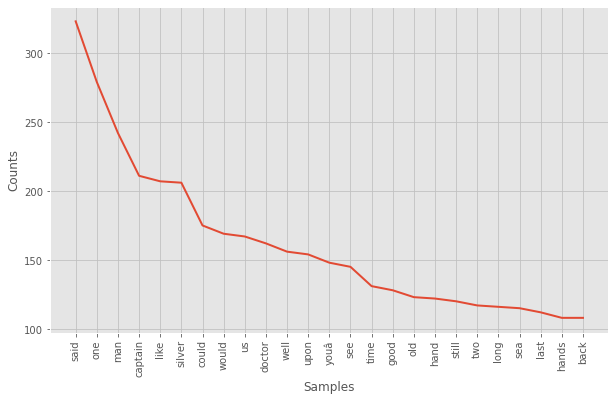

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
ti_freqdist = nltk.FreqDist(ti_words_ns)
ti_freqdist.plot(25)

In [31]:
for word, frequency in ti_freqdist.most_common(12):
    print(word, frequency)

said 323
one 279
man 242
captain 211
like 207
silver 206
could 175
would 169
us 167
doctor 162
well 156
upon 154


In [34]:
tiDict = dict([(word,frequency) 
               for word, frequency in ti_freqdist.most_common(100)])


In [36]:
wc = WordCloud(background_color='black', width=400, height=800, 
               max_words=100)
wc.generate_from_frequencies(tiDict)

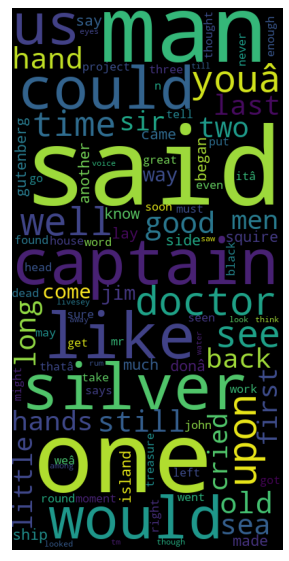

In [38]:
fig, ax = plt.subplots(1,figsize=(6,10))
ax.imshow(wc)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)